In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel(r"ccfd.xlsx")

In [5]:
df_cp = df.copy()

In [6]:
df_cp.head()

,S.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [19]:
df_cp.columns

Index(['S.No', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Not fraud', 'fraud'],
      dtype='object')

In [20]:
df['fraud_amt'] = df['amt'][df['is_fraud'] == 0]
df['non_fraud_amt'] = df['amt'][df['is_fraud'] == 1]

# Fill NaN values in 'fraud_amt' and 'non_fraud_amt' columns with 0
df['fraud_amt'].fillna(0, inplace=True)
df['non_fraud_amt'].fillna(0, inplace=True)


In [22]:
df_cp[['Not fraud','fraud']] = pd.get_dummies(df_cp['is_fraud']).astype(int)

In [23]:
df_new = df_cp.groupby(['cc_num'])[['amt','Not fraud','fraud']].sum()

In [24]:
df_new['tot_amt'] = df_new['amt']
df_new.drop(['amt'],axis=1,inplace=True)

In [25]:
df_new_mn = df_cp.groupby(['cc_num'])['amt'].mean().to_frame()
df_new_mn['avg_amt'] = df_new_mn['amt']
df_new_mn.drop(['amt'],axis=1,inplace=True)
df_nn = pd.concat([df_new_mn,df_new], axis=1)

In [26]:
df_nn.reset_index(inplace=True)
df_nn

,cc_num,avg_amt,Not fraud,fraud,tot_amt
0,60416207185,58.660253,475,0,27863.62
1,60422928733,54.832361,466,0,25551.88
2,60423098130,58.028902,164,0,9516.74
3,60427851591,94.973442,154,0,14625.91
4,60487002085,109.179480,165,8,18888.05
...,...,...,...,...,...
917,4958589671582720000,74.963763,482,7,36657.28
918,4973530368125479936,62.370339,295,0,18399.25
919,4980323467523539968,59.382324,142,0,8432.29
920,4989847570577630208,102.107262,310,15,33184.86


In [39]:
df_nn

,cc_num,avg_amt,Not fraud,fraud,tot_amt
0,60416207185,58.660253,475,0,27863.62
1,60422928733,54.832361,466,0,25551.88
2,60423098130,58.028902,164,0,9516.74
3,60427851591,94.973442,154,0,14625.91
4,60487002085,109.179480,165,8,18888.05
...,...,...,...,...,...
917,4958589671582720000,74.963763,482,7,36657.28
918,4973530368125479936,62.370339,295,0,18399.25
919,4980323467523539968,59.382324,142,0,8432.29
920,4989847570577630208,102.107262,310,15,33184.86


In [40]:
df = df_cp.copy()

In [42]:
import pandas as pd

# Assuming df is your DataFrame
# Create a new DataFrame with unique cc_num values
unique_cc_nums = pd.DataFrame(df['cc_num'].unique(), columns=['cc_num'])

# Left join with the fraud_df to get fraud amounts for each cc_num
unique_cc_nums = pd.merge(unique_cc_nums, df[df['is_fraud'] == 1].groupby('cc_num')['amt'].sum().reset_index(), on='cc_num', how='left')

# Fill NaN values with 0 for cc_num with no fraud transactions
unique_cc_nums['amt'] = unique_cc_nums['amt'].fillna(0)

# Rename the columns for clarity
unique_cc_nums.columns = ['cc_num', 'fraud_amt']

# If you want to convert the fraud_amt column to integer, you can use the astype() method
unique_cc_nums['fraud_amt'] = unique_cc_nums['fraud_amt'].astype(int)

# Display the resulting DataFrame
print(unique_cc_nums)


               cc_num  fraud_amt
0    2291163933867240          0
1    3573030041201290          0
2    3598215285024750          0
3    3591919803438420          0
4    3526826139003040          0
..                ...        ...
917   180020605265701       7993
918   347399333635231       4709
919     4883407061576       6267
920     4295296907373       4272
921  4087542780207160       4175

[922 rows x 2 columns]


In [43]:
unique_cc_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   cc_num     922 non-null    int64
 1   fraud_amt  922 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 10.9 KB


In [44]:
merged_df = df_nn.merge(unique_cc_nums, on='cc_num', how='inner')


In [49]:
merged_df

,cc_num,avg_amt,Not fraud,fraud,tot_amt,fraud_amt
0,60416207185,58.660253,475,0,27863.62,0
1,60422928733,54.832361,466,0,25551.88,0
2,60423098130,58.028902,164,0,9516.74,0
3,60427851591,94.973442,154,0,14625.91,0
4,60487002085,109.179480,165,8,18888.05,5610
...,...,...,...,...,...,...
917,4958589671582720000,74.963763,482,7,36657.28,5638
918,4973530368125479936,62.370339,295,0,18399.25,0
919,4980323467523539968,59.382324,142,0,8432.29,0
920,4989847570577630208,102.107262,310,15,33184.86,4234


In [ ]:
merged_df['fraud_amt_avg'] = merged_df['fraud_amt']/merged_df['fraud']
merged_df['non_fraud_amt_avg'] = merged_df['non_fraud_amt']/merged_df['Not fraud']

In [ ]:
merged_df.fillna(0,inplace=True)
merged_df

In [93]:
df_nn = merged_df.copy()

In [94]:
df_nn.drop(['Not fraud','fraud','tot_amt','non_fraud_amt','fraud_amt'],axis=1,inplace=True)

In [95]:
df_nn

,cc_num,avg_amt,fraud_amt_avg,non_fraud_amt_avg
0,60416207185,58.660253,0.000000,58.660253
1,60422928733,54.832361,0.000000,54.832361
2,60423098130,58.028902,0.000000,58.028902
3,60427851591,94.973442,0.000000,94.973442
4,60487002085,109.179480,701.350000,80.468182
...,...,...,...,...
917,4958589671582720000,74.963763,805.432857,64.355290
918,4973530368125479936,62.370339,0.000000,62.370339
919,4980323467523539968,59.382324,0.000000,59.382324
920,4989847570577630208,102.107262,282.280667,93.389194


In [11]:
df_cp['cc_freq'] = df_cp.groupby('cc_num')['cc_num'].transform('count')

In [12]:
df_cp['max_amt'] = df_cp.groupby('cc_num')['amt'].transform('max')
df_cp['min_amt'] = df_cp.groupby('cc_num')['amt'].transform('min')

In [13]:
df_nn = df_nn.merge(df_cp[['cc_num', 'cc_freq', 'max_amt', 'min_amt']], how='left', on='cc_num')
df_nn = df_nn[df_nn['cc_num'].isin(df_cp['cc_num'])].drop_duplicates(subset=['cc_num'], keep='first')

In [14]:
df_nn

,cc_num,avg_amt,Not fraud,fraud,tot_amt,cc_freq,max_amt,min_amt
0,60416207185,58.660253,475,0,27863.62,475,1404.30,1.02
475,60422928733,54.832361,466,0,25551.88,466,305.33,1.05
941,60423098130,58.028902,164,0,9516.74,164,497.97,1.17
1105,60427851591,94.973442,154,0,14625.91,154,592.90,29.15
1259,60487002085,109.179480,165,8,18888.05,173,2758.46,1.02
...,...,...,...,...,...,...,...,...
387120,4958589671582720000,74.963763,482,7,36657.28,489,1060.90,1.00
387609,4973530368125479936,62.370339,295,0,18399.25,295,1060.58,1.03
387904,4980323467523539968,59.382324,142,0,8432.29,142,709.24,1.01
388046,4989847570577630208,102.107262,310,15,33184.86,325,887.80,1.07


In [15]:
df_mer = df_cp.groupby(['merchant'])[['Not fraud','fraud']].sum()

In [16]:
df_mer

,Not fraud,fraud
merchant,,
fraud_Abbott-Rogahn,541,1
fraud_Abbott-Steuber,514,2
fraud_Abernathy and Sons,543,0
fraud_Abshire PLC,575,0
"fraud_Adams, Kovacek and Kuhlman",291,1
...,...,...
fraud_Zemlak Group,401,4
"fraud_Zemlak, Tillman and Cremin",517,1
fraud_Ziemann-Waters,518,4


In [17]:
df_cat = df_cp.groupby(['category'])[['Not fraud','fraud']].sum()
df_cat

,Not fraud,fraud
category,,
entertainment,28019,52
food_dining,27680,48
gas_transport,39191,122
grocery_net,13486,34
grocery_pos,36465,407
health_fitness,25581,46
home,36528,50
kids_pets,34087,55
misc_net,19003,221


In [18]:
df_job = df_cp.groupby(['job'])[['Not fraud','fraud']].sum()
df_job

,Not fraud,fraud
job,,
Academic librarian,282,0
"Accountant, chartered certified",149,12
"Accountant, chartered public finance",774,0
Accounting technician,1369,0
Acupuncturist,424,0
...,...,...
Water engineer,1800,2
Water quality scientist,149,0
Web designer,741,0


In [19]:
import datetime as dt
df_cp['tran_hour'] = df_cp['trans_date_trans_time'].dt.hour

In [20]:
df_tran_hour = df_cp.groupby('tran_hour')[['Not fraud','fraud']].sum()
df_tran_hour

,Not fraud,fraud
tran_hour,,
0,12521,158
1,12648,144
2,12576,139
3,12508,160
4,12768,10
5,12500,17
6,12640,12
7,12639,15
8,12518,7


In [21]:
df_state = df_cp.groupby('state')[['Not fraud','fraud']].sum()
df_state

,Not fraud,fraud
state,,
AK,581,0
AL,12284,63
AR,9503,14
AZ,3156,27
CA,16863,39
CO,4059,2
CT,2273,40
DC,1090,0
FL,12736,43


In [22]:
df_city = df_cp.groupby('city')[['Not fraud','fraud']].sum()
df_city

,Not fraud,fraud
city,,
Achille,142,0
Acworth,573,0
Adams,143,12
Afton,638,7
Akron,138,9
...,...,...
Woods Cross,156,0
Woodville,552,10
Yellowstone National Park,157,0


In [23]:
df_cp.dtypes

S.No                              int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
Not fraud                         int32
fraud                             int32


## NaN

In [60]:
import warnings

warnings.filterwarnings('ignore')


In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## amt segment

In [26]:

features = ['amt', 'is_fraud']

n_clusters = 3
init = 'k-means++'
n_init = 100
max_iter = 1000



kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter)


kmeans.fit(df_cp[features])


segments = kmeans.predict(df_cp[features])

# Add the cluster labels to the data frame

df_cp['amt_segment'] = segments


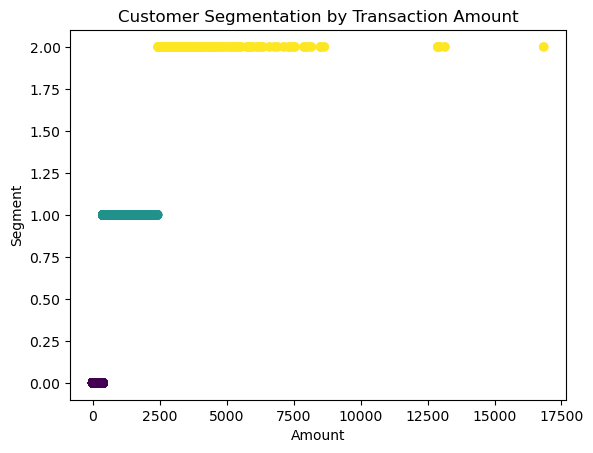

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df_cp['amt'], df_cp['amt_segment'], c=segments)
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Transaction Amount')
plt.show()

In [28]:
df_cp.groupby(['amt_segment'])['amt'].min()

amt_segment
0       1.00
1     381.32
2    2437.87
Name: amt, dtype: float64

In [29]:
df_cp.groupby(['amt_segment'])['Not fraud'].sum()

amt_segment
0    381680
1      5359
2       188
Name: Not fraud, dtype: int32

In [30]:
df_cp.groupby(['amt_segment'])['fraud'].sum()

amt_segment
0    909
1    867
2      0
Name: fraud, dtype: int32

In [31]:
df_cp['amt_segment'] = df_cp['amt_segment'].replace([0, 2], [2, 0])

In [32]:
df_cp['amt_segment'] = df_cp['amt_segment'].replace([1, 2], [2, 1])

## cc_num segmentation

In [51]:
merged_df

,cc_num,avg_amt,Not fraud,fraud,tot_amt,fraud_amt,cluster
0,60416207185,58.660253,475,0,27863.62,0,0
1,60422928733,54.832361,466,0,25551.88,0,0
2,60423098130,58.028902,164,0,9516.74,0,0
3,60427851591,94.973442,154,0,14625.91,0,0
4,60487002085,109.179480,165,8,18888.05,5610,1
...,...,...,...,...,...,...,...
917,4958589671582720000,74.963763,482,7,36657.28,5638,1
918,4973530368125479936,62.370339,295,0,18399.25,0,0
919,4980323467523539968,59.382324,142,0,8432.29,0,0
920,4989847570577630208,102.107262,310,15,33184.86,4234,2


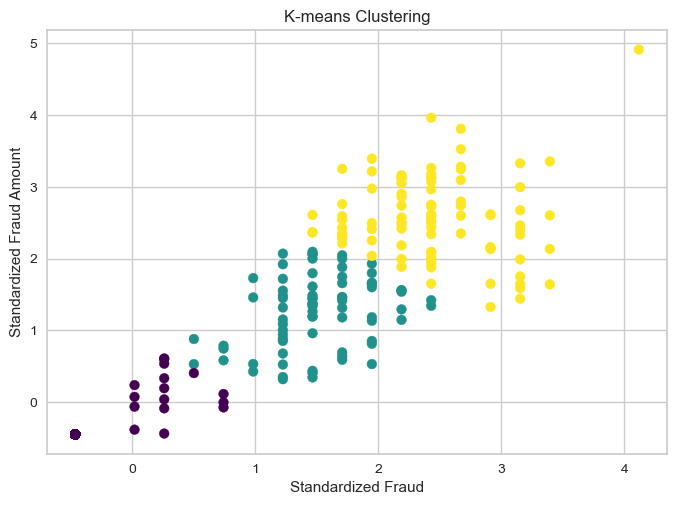

In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = merged_df[['fraud', 'fraud_amt']]

scaler = StandardScaler()
X = scaler.fit_transform(features)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
merged_df['cluster'] = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=merged_df['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Standardized Fraud')
plt.ylabel('Standardized Fraud Amount')
plt.show()


In [89]:
merged_df.groupby(['cluster'])['fraud_amt'].sum()

cluster
High Risk    614472
Low Risk      20816
Mid Risk     290497
Name: fraud_amt, dtype: int32

In [88]:
merged_df['cluster'].value_counts()

cluster
Low Risk     755
High Risk     91
Mid Risk      76
Name: count, dtype: int64

In [90]:
merged_df.groupby(['cluster'])['fraud'].sum()

cluster
High Risk    1101
Low Risk       51
Mid Risk      624
Name: fraud, dtype: int32

In [86]:
merged_df['cluster'] = merged_df['cluster'].map({0 : "Low Risk", 1 : "Mid Risk", 2:"High Risk"})

In [134]:
merged_df.to_csv("cc_num_segmentation.csv",index=False)

**0 - 0.46, 1 - 0.31, 2 -  0.57**

In [25]:
df_nn['freq_of_fraud'] = df_nn['fraud']/df_nn['cc_freq']*100

In [26]:
df_nn['seg_fraud_freq'] = pd.cut(df_nn['freq_of_fraud'], bins=[-1, 10, 66, 101], labels=['low_risk', 'mid_risk', 'high_risk'])

In [27]:
df_nn['seg_fraud_freq'].value_counts()

seg_fraud_freq
low_risk     908
high_risk     14
mid_risk       0
Name: count, dtype: int64

In [28]:
df_nn['seg_fraud_coun'] = pd.cut(df_nn['fraud'], bins=[-1, 6, 12, 20], labels=['low_risk', 'mid_risk', 'high_risk'])

In [29]:
df_nn['seg_fraud_coun'].value_counts()

seg_fraud_coun
low_risk     764
mid_risk     126
high_risk     32
Name: count, dtype: int64

In [30]:
df_nn['seg_fraud_coun'].value_counts()

seg_fraud_coun
low_risk     764
mid_risk     126
high_risk     32
Name: count, dtype: int64

In [31]:
df_nn.groupby(['cc_num_segment'])['cc_num'].count()

cc_num_segment
0    839
1     48
2     35
Name: cc_num, dtype: int64

In [35]:
df_cp = df_cp.merge(df_nn[['cc_num', 'cc_num_segment']], how='left', on='cc_num')

In [34]:
df_nn['cc_num_segment'] = df_nn['cc_num_segment'].map({0 : "mid_risk",1:"low_risk",2:"high_risk"})

In [37]:
df_nn.to_csv("cc_num_segments_final.csv",index=False)

## merchant segmentation

In [49]:
df_mer.reset_index(inplace=True)

In [50]:
df_mer

,merchant,Not fraud,fraud
0,fraud_Abbott-Rogahn,541,1
1,fraud_Abbott-Steuber,514,2
2,fraud_Abernathy and Sons,543,0
3,fraud_Abshire PLC,575,0
4,"fraud_Adams, Kovacek and Kuhlman",291,1
...,...,...,...
688,fraud_Zemlak Group,401,4
689,"fraud_Zemlak, Tillman and Cremin",517,1
690,fraud_Ziemann-Waters,518,4
691,"fraud_Zieme, Bode and Dooley",804,2


In [51]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_df_mer = label_encoder.fit_transform(df_mer['merchant'])

df_mer['mer_label'] = encoded_df_mer

df_mer

,merchant,Not fraud,fraud,mer_label
0,fraud_Abbott-Rogahn,541,1,0
1,fraud_Abbott-Steuber,514,2,1
2,fraud_Abernathy and Sons,543,0,2
3,fraud_Abshire PLC,575,0,3
4,"fraud_Adams, Kovacek and Kuhlman",291,1,4
...,...,...,...,...
688,fraud_Zemlak Group,401,4,688
689,"fraud_Zemlak, Tillman and Cremin",517,1,689
690,fraud_Ziemann-Waters,518,4,690
691,"fraud_Zieme, Bode and Dooley",804,2,691


In [56]:
features = ['mer_label','fraud']

n_clusters = 3
init = 'k-means++'
n_init = 100
max_iter = 1000


kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter)


kmeans.fit(df_mer[features])


segments = kmeans.predict(df_mer[features])

# Add the cluster labels to the data frame

df_mer['mer_segment'] = segments


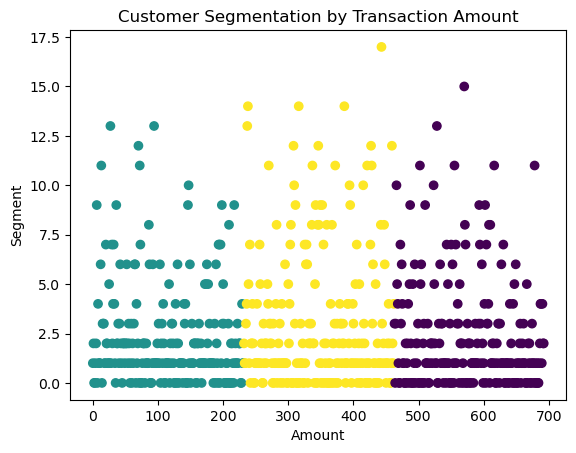

In [57]:
plt.scatter(df_mer['mer_label'], df_mer['fraud'], c=segments)
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Transaction Amount')
plt.show()

In [64]:
df_mer.groupby(['mer_segment'])['Not fraud'].sum()

mer_segment
0    125433
1    128314
2    133480
Name: Not fraud, dtype: int32

In [65]:
df_mer.groupby(['mer_segment'])['fraud'].sum()

mer_segment
0    691
1    543
2    542
Name: fraud, dtype: int32

In [63]:
df_mer['mer_segment'] = df_mer['mer_segment'].replace([1, 2], [2, 1])

In [66]:
df_cp = df_cp.merge(df_mer[['merchant', 'mer_segment']], how='left', on='merchant')

## category segment

In [67]:
df_cat.reset_index(inplace= True)
df_cat

,category,Not fraud,fraud
0,entertainment,28019,52
1,food_dining,27680,48
2,gas_transport,39191,122
3,grocery_net,13486,34
4,grocery_pos,36465,407
5,health_fitness,25581,46
6,home,36528,50
7,kids_pets,34087,55
8,misc_net,19003,221
9,misc_pos,24142,64


In [68]:
encoded_df_cat = label_encoder.fit_transform(df_cat['category'])

df_cat['cat_label'] = encoded_df_cat
df_cat

,category,Not fraud,fraud,cat_label
0,entertainment,28019,52,0
1,food_dining,27680,48,1
2,gas_transport,39191,122,2
3,grocery_net,13486,34,3
4,grocery_pos,36465,407,4
5,health_fitness,25581,46,5
6,home,36528,50,6
7,kids_pets,34087,55,7
8,misc_net,19003,221,8
9,misc_pos,24142,64,9


In [73]:
features = ['cat_label','fraud']

n_clusters = 3
init = 'k-means++'
n_init = 100
max_iter = 1000


kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter)


kmeans.fit(df_cat[features])


segments = kmeans.predict(df_cat[features])

# Add the cluster labels to the data frame

df_cat['cat_segment'] = segments


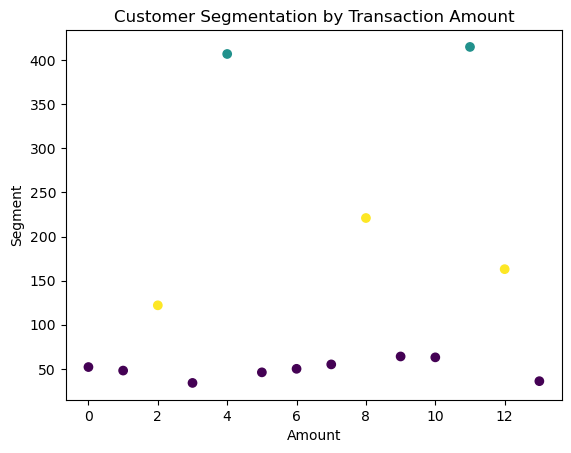

In [74]:
plt.scatter(df_cat['cat_label'], df_cat['fraud'], c=segments)
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Transaction Amount')
plt.show()

In [81]:
df_cat.groupby(['cat_segment'])['Not fraud'].sum()

cat_segment
0     65332
1     92725
2    229170
Name: Not fraud, dtype: int32

In [82]:
df_cat.groupby(['cat_segment'])['fraud'].sum()

cat_segment
0    822
1    506
2    448
Name: fraud, dtype: int32

In [80]:
df_cat['cat_segment'] = df_cat['cat_segment'].replace([1, 2], [2, 1])

In [83]:
df_cp = df_cp.merge(df_cat[['category', 'cat_segment']], how='left', on='category')

## job segment

In [84]:
df_job.reset_index(inplace=True)
df_job

,job,Not fraud,fraud
0,Academic librarian,282,0
1,"Accountant, chartered certified",149,12
2,"Accountant, chartered public finance",774,0
3,Accounting technician,1369,0
4,Acupuncturist,424,0
...,...,...,...
473,Water engineer,1800,2
474,Water quality scientist,149,0
475,Web designer,741,0
476,Wellsite geologist,747,12


In [85]:
lr = LabelEncoder()
enc = lr.fit_transform(df_job['job'])
df_job['job_label'] = enc
df_job

,job,Not fraud,fraud,job_label
0,Academic librarian,282,0,0
1,"Accountant, chartered certified",149,12,1
2,"Accountant, chartered public finance",774,0,2
3,Accounting technician,1369,0,3
4,Acupuncturist,424,0,4
...,...,...,...,...
473,Water engineer,1800,2,473
474,Water quality scientist,149,0,474
475,Web designer,741,0,475
476,Wellsite geologist,747,12,476


In [86]:
features = ['job_label','fraud']

n_clusters = 3
init = 'k-means++'
n_init = 100
max_iter = 1000


kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter)


kmeans.fit(df_job[features])


segments = kmeans.predict(df_job[features])

# Add the cluster labels to the data frame

df_job['job_segment'] = segments


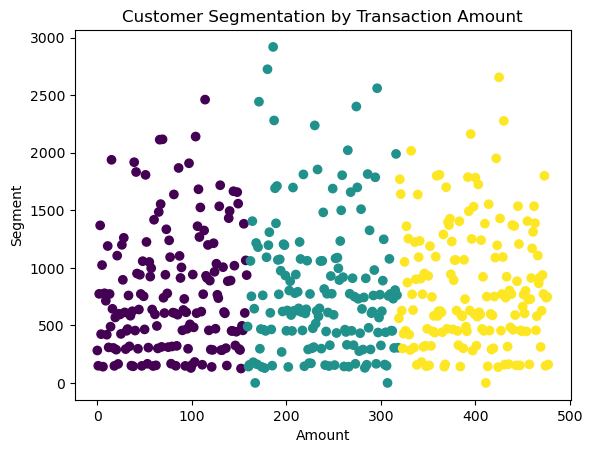

In [87]:
plt.scatter(df_job['job_label'], df_job['Not fraud'], c=segments)
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Transaction Amount')
plt.show()

In [91]:
df_job.groupby(['job_segment'])['Not fraud'].sum()

job_segment
0    124842
1    132334
2    130051
Name: Not fraud, dtype: int32

In [92]:
df_job.groupby(['job_segment'])['fraud'].sum()

job_segment
0    667
1    596
2    513
Name: fraud, dtype: int32

In [90]:
df_job['job_segment'] = df_job['job_segment'].replace([1, 2], [2, 1])

In [93]:
df_cp = df_cp.merge(df_job[['job', 'job_segment']], how='left', on='job')

## tran_hour_segmentation

In [94]:
df_tran_hour.reset_index(inplace=True)
df_tran_hour

,tran_hour,Not fraud,fraud
0,0,12521,158
1,1,12648,144
2,2,12576,139
3,3,12508,160
4,4,12768,10
5,5,12500,17
6,6,12640,12
7,7,12639,15
8,8,12518,7
9,9,12647,12


In [99]:
features = ['tran_hour','fraud','Not fraud']

n_clusters = 3
init = 'k-means++'
n_init = 100
max_iter = 1000


kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter)


kmeans.fit(df_tran_hour[features])


segments = kmeans.predict(df_tran_hour[features])

# Add the cluster labels to the data frame

df_tran_hour['tran_hour_segment'] = segments


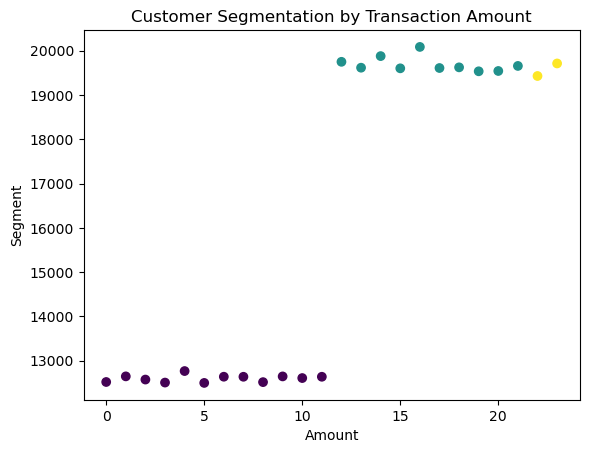

In [100]:
plt.scatter(df_tran_hour['tran_hour'], df_tran_hour['Not fraud'], c=segments)
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Transaction Amount')
plt.show()

In [107]:
df_tran_hour.groupby(['tran_hour_segment'])['Not fraud'].sum()

tran_hour_segment
0     39137
1    151214
2    196876
Name: Not fraud, dtype: int32

In [108]:
df_tran_hour.groupby(['tran_hour_segment'])['fraud'].sum()

tran_hour_segment
0    900
1    699
2    177
Name: fraud, dtype: int32

In [106]:
df_tran_hour['tran_hour_segment'] = df_tran_hour['tran_hour_segment'].replace([1, 2], [2, 1])

In [109]:
df_cp = df_cp.merge(df_tran_hour[['tran_hour', 'tran_hour_segment']], how='left', on='tran_hour')

## state segmentation

In [110]:
df_state.reset_index(inplace=True)
df_state.head()

,state,Not fraud,fraud
0,AK,581,0
1,AL,12284,63
2,AR,9503,14
3,AZ,3156,27
4,CA,16863,39


In [111]:
lr = LabelEncoder()
enc = lr.fit_transform(df_state['state'])
df_state['st_label'] = enc
df_state.head()

,state,Not fraud,fraud,st_label
0,AK,581,0,0
1,AL,12284,63,1
2,AR,9503,14,2
3,AZ,3156,27,3
4,CA,16863,39,4


In [112]:
features = ['st_label','Not fraud','fraud']

n_clusters = 3
init = 'k-means++'
n_init = 100
max_iter = 1000


kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter)


kmeans.fit(df_state[features])


segments = kmeans.predict(df_state[features])

# Add the cluster labels to the data frame

df_state['state_segment'] = segments


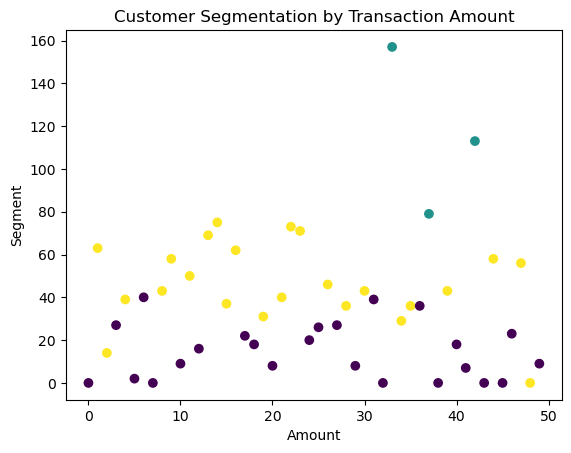

In [113]:
plt.scatter(df_state['st_label'], df_state['fraud'], c=segments)
plt.xlabel('Amount')
plt.ylabel('Segment')
plt.title('Customer Segmentation by Transaction Amount')
plt.show()

In [117]:
df_state.groupby(['state_segment'])['Not fraud'].sum()

state_segment
0    225923
1     77042
2     84262
Name: Not fraud, dtype: int32

In [118]:
df_state.groupby(['state_segment'])['fraud'].sum()

state_segment
0    1072
1     349
2     355
Name: fraud, dtype: int32

In [116]:
df_state['state_segment'] = df_state['state_segment'].replace([0, 2], [2, 0])

In [119]:
df_cp = df_cp.merge(df_state[['state', 'state_segment']], how='left', on='state')

In [126]:
transaction_segment = df_cp[['amt_segment', 'cc_num_segment', 'mer_segment', 'cat_segment', 'job_segment', 'tran_hour_segment', 'state_segment']].mean(axis=1)
transaction_segment

0         1.000000
1         1.285714
2         1.285714
3         1.142857
4         1.000000
            ...   
388998    1.285714
388999    0.714286
389000    1.428571
389001    0.857143
389002    1.142857
Length: 389003, dtype: float64

In [141]:
df_cp['transaction_segment'] = transaction_segment.round().astype(int)

In [143]:
df_seg_num = df_cp.copy()

In [149]:
df_seg_num.to_csv('ccfd_seg_nums.csv',index=False)

In [154]:
df_segments = df_cp.copy()

In [155]:
columns = ['amt_segment','cc_num_segment','mer_segment','cat_segment','job_segment','tran_hour_segment','state_segment','transaction_segment']

for i in columns:
    df_segments[i] = df_segments[i].map({0: 'High_Risk', 1: 'Mid_Risk', 2: 'Low_Risk'})

df_segments.head()

,S.No,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,min_amt,tran_hour,amt_segment,cc_num_segment,mer_segment,cat_segment,job_segment,tran_hour_segment,state_segment,transaction_segment
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1.17,12,Mid_Risk,High_Risk,High_Risk,Low_Risk,Low_Risk,Low_Risk,High_Risk,Mid_Risk
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1.01,12,Mid_Risk,High_Risk,Mid_Risk,Low_Risk,Mid_Risk,Low_Risk,Low_Risk,Mid_Risk
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1.03,12,Mid_Risk,High_Risk,Mid_Risk,Low_Risk,Low_Risk,Low_Risk,Mid_Risk,Mid_Risk
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1.01,12,Mid_Risk,High_Risk,Low_Risk,Low_Risk,Mid_Risk,Low_Risk,High_Risk,Mid_Risk
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1.02,12,Mid_Risk,High_Risk,High_Risk,Low_Risk,Low_Risk,Low_Risk,High_Risk,Mid_Risk


In [156]:
df_segments.to_csv('ccfd_segments.csv',index=False)